In [1]:
# Standard modules
import pdb
import os
import sys
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append('..')
from simstackwrapper import SimstackWrapper

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The cosmos2020 catalogs (FARMER and CLASSIC) are enormous and can be problematic to work with.  The purpose of this notebook is to identify the columns we want to keep, and export them to a CSV file.  

# Import .fits table

In [2]:
# Import table with astropy
path_cosmos2020 = os.path.join(os.environ['CATSPATH'], "cosmos","COSMOS2020_CLASSIC_R1_v2.0.fits")
if os.path.isfile(path_cosmos2020):
    print('Open ',path_cosmos2020)
    with fits.open(path_cosmos2020) as hdul:
        hdul.verify('fix')
        cosmos_catalog = hdul[1].data
else:
    print(path_cosmos2020, ' not found')

Open  D:\catalogs\cosmos\COSMOS2020_CLASSIC_R1_v2.0.fits


In [4]:
# Load Table into a pandas DataFrame
cosmos2020 = pd.DataFrame(cosmos_catalog)

In [5]:
# Inspect DataFrame
cosmos2020.head()

,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,1,150.477592,2.328928,14051.033584,24912.034028,0.019432,0.011545,150.477638,2.328998,181_32,...,7.233708e-10,7.644314e-10,8.143318e-10,8.632033e-10,8.911240e-10,0.038461,0.038461,0.038461,0.038461,0.038461
1,2,150.477978,2.329170,14041.782916,24917.839703,0.102373,0.130554,150.477974,2.329203,181_33,...,1.830070e-09,2.409026e-09,3.324255e-09,4.600055e-09,6.119547e-09,0.018737,0.018737,0.018737,0.018737,0.018737
2,3,150.477024,2.329483,14064.658196,24925.345146,0.000271,0.001011,150.477111,2.329702,181_34,...,2.200910e-09,2.320781e-09,2.455770e-09,2.584069e-09,2.660101e-09,0.018737,0.018737,0.018737,0.018737,0.018737
3,4,150.477312,2.330573,14057.758498,24951.520772,0.098902,0.094682,150.477316,2.330608,181_38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,150.474793,2.332136,14118.162336,24989.006449,0.017773,0.035394,150.474843,2.332213,181_39,...,1.146235e-08,1.146235e-08,1.146235e-08,1.146235e-08,1.146235e-08,0.042471,0.042471,0.042471,0.042471,0.042471


In [7]:
# Look how many columns!
print([i for i in cosmos2020.keys()])

['ID', 'ALPHA_J2000', 'DELTA_J2000', 'X_MODEL', 'Y_MODEL', 'ERRX_MODEL', 'ERRY_MODEL', 'ALPHA_DETECTION', 'DELTA_DETECTION', 'FARMER_ID', 'N_GROUP', 'FLAG_HSC', 'FLAG_SUPCAM', 'FLAG_UDEEP', 'FLAG_UVISTA', 'FLAG_COMBINED', 'EBV_MW', 'CFHT_u_FLUX', 'CFHT_u_FLUXERR', 'CFHT_u_MAG', 'CFHT_u_MAGERR', 'CFHT_u_CHISQ', 'CFHT_u_DRIFT', 'CFHT_u_VALID', 'CFHT_ustar_FLUX', 'CFHT_ustar_FLUXERR', 'CFHT_ustar_MAG', 'CFHT_ustar_MAGERR', 'CFHT_ustar_CHISQ', 'CFHT_ustar_DRIFT', 'CFHT_ustar_VALID', 'HSC_g_FLUX', 'HSC_g_FLUXERR', 'HSC_g_MAG', 'HSC_g_MAGERR', 'HSC_g_CHISQ', 'HSC_g_DRIFT', 'HSC_g_VALID', 'HSC_r_FLUX', 'HSC_r_FLUXERR', 'HSC_r_MAG', 'HSC_r_MAGERR', 'HSC_r_CHISQ', 'HSC_r_DRIFT', 'HSC_r_VALID', 'HSC_i_FLUX', 'HSC_i_FLUXERR', 'HSC_i_MAG', 'HSC_i_MAGERR', 'HSC_i_CHISQ', 'HSC_i_DRIFT', 'HSC_i_VALID', 'HSC_z_FLUX', 'HSC_z_FLUXERR', 'HSC_z_MAG', 'HSC_z_MAGERR', 'HSC_z_CHISQ', 'HSC_z_DRIFT', 'HSC_z_VALID', 'HSC_y_FLUX', 'HSC_y_FLUXERR', 'HSC_y_MAG', 'HSC_y_MAGERR', 'HSC_y_CHISQ', 'HSC_y_DRIFT', 'HSC_y

# Convert to vaex for speed

In [8]:
import vaex
vaex_df = vaex.from_pandas(cosmos2020, copy_index=False)

In [9]:
# Export to hdf5 for more efficient use later
path_cosmos2020_hdf5 = os.path.join(os.environ['CATSPATH'], "cosmos","cosmos2020_farmer.hdf5")
vaex_df.export_hdf5(path_cosmos2020_hdf5)

In [10]:
# Convert flux to magnitude
# AB = -2.5 log S (Jy) + 8.9
vaex_df['rest_AB_U'] = (-2.5 * np.log10(vaex_df.ez_restU * 1e6) + 8.9)
vaex_df['rest_AB_V'] = (-2.5 * np.log10(vaex_df.ez_restV * 1e6) + 8.9)
vaex_df['rest_AB_J'] = (-2.5 * np.log10(vaex_df.ez_restJ * 1e6) + 8.9)

In [11]:
# Estimate rest-frame U-V and V-J
vaex_df['ez_restU-V']=(vaex_df.rest_AB_U - vaex_df.rest_AB_V) 
vaex_df['ez_restV-J']=(vaex_df.rest_AB_V - vaex_df.rest_AB_J)

In [12]:
# Convert flux to magnitude
# AB = -2.5 log S (Jy) + 8.9
vaex_df['galex_AB_NUV'] = vaex_df.lp_MNUV
vaex_df['vista_AB_R'] = vaex_df.lp_MR

In [13]:
# Estimate rest-frame U-V and V-J
vaex_df['restNUV-R']=(vaex_df.lp_MNUV - vaex_df.lp_MR) 
vaex_df['restR-J']=(vaex_df.lp_MR - vaex_df.lp_MJ)

In [15]:
# Extract subset of array and drop nans
features = ['ALPHA_J2000','DELTA_J2000','lp_zBEST','lp_mass_med','ez_restU-V','ez_restV-J','restNUV-R','restR-J','lp_SFR_best','lp_sSFR_med','lp_type']
uvj_df_raw = vaex_df[features].dropna()
uvj_df = uvj_df_raw[uvj_df_raw['lp_type'] >= 0]

In [13]:
# Inspect remaining sources
print(np.unique(uvj_df['lp_type'].values), ': unique values present in lp_type')
print(np.sum(uvj_df['lp_type'].values == -99), ' stars?')
print(np.sum(uvj_df['lp_type'].values == 0), ' galaxies')
print(np.sum(uvj_df['lp_type'].values == 1), ' agn')

[0 1] : unique values present in lp_type
0  stars?
704998  galaxies
7480  agn


In [16]:
uvj_df.head()

#,ALPHA_J2000,DELTA_J2000,lp_zBEST,lp_mass_med,ez_restU-V,ez_restV-J,restNUV-R,restR-J,lp_SFR_best,lp_sSFR_med,lp_type
0,150.478,2.32893,1.593,8.5707,0.604582,-0.1974,0.91571,-0.45688,0.2347,-8.35894,0
1,150.478,2.32917,0.1151,5.51014,0.0812092,-0.20371,0.61624,0.05139,-2.456,-8.27277,0
2,150.477,2.32948,0.2211,7.7155,0.283352,0.016571,0.77388,-0.02733,-1.038,-8.69058,0
3,150.475,2.33214,2.8698,8.08458,0.326889,-0.820299,0.6281,-1.1315,0.4251,-7.65374,0
4,150.475,2.33248,1.5139,8.00612,0.0394707,1.01503,1.17316,-0.11858,-1.146,-8.5336,0
5,150.476,2.33258,0.1042,5.66375,0.797152,-0.340175,1.5441,-0.07421,-3.967,-8.84085,0
6,150.477,2.33151,0.707,8.6938,0.713431,0.275357,1.25635,0.08144,-0.1711,-8.86262,0
7,150.476,2.33308,0.5725,6.6407,nan,nan,0.90482,-0.64738,-0.6479,-7.30026,0
8,150.722,1.79216,2.8235,8.93768,0.390234,0.913765,1.06014,0.70013,-0.414,-8.67984,0
9,150.478,2.33334,1.7093,8.74635,0.702111,-0.106309,1.13777,-0.27577,0.1578,-8.59718,0


# Export simplified, nan-free table, to csv

In [17]:
path_cosmos2020_csv = os.path.join(os.environ['CATSPATH'], "cosmos","cosmos2020_FARMER.csv")
uvj_df.export_csv(path_cosmos2020_csv)

# Plot U-V/V-J vs specific star-formation rate

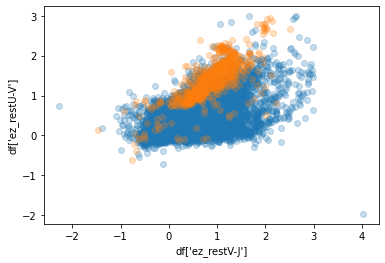

In [21]:
sfr_cut = -9.5
ns=10000
uvj_df[:ns].scatter(uvj_df['ez_restV-J'],uvj_df['ez_restU-V'], selection = uvj_df['lp_sSFR_med'] > sfr_cut, alpha=0.25)
uvj_df[:ns].scatter(uvj_df['ez_restV-J'],uvj_df['ez_restU-V'], selection = uvj_df['lp_sSFR_med'] <= sfr_cut, alpha=0.25)

# Plot NUV-R/R-J vs specific star-formation rate

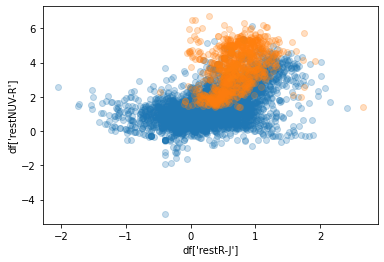

In [23]:
sfr_cut = -9.5
ns=10000
uvj_df[:ns].scatter(uvj_df['restR-J'], uvj_df['restNUV-R'], selection = uvj_df['lp_sSFR_med'] > sfr_cut, alpha=0.25)
uvj_df[:ns].scatter(uvj_df['restR-J'], uvj_df['restNUV-R'], selection = uvj_df['lp_sSFR_med'] <= sfr_cut, alpha=0.25)